# Introduction to SIFT (Scale-Invariant Feature Transform)

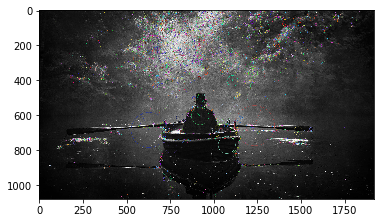

(<matplotlib.image.AxesImage at 0x7f17fb6820d0>, None)

In [20]:
import cv2
 
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
from scipy.misc import imread, imresize
 
 
 
pd.set_option('display.max_rows', 10)

image_file = 'taboo.jpg'
 
img = cv2.imread(image_file)
plt.imshow(img)


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)


# Create a SIFT Object
sift = cv2.xfeatures2d.SIFT_create()
 
# Get the Key Points from the 'gray' image, this returns a numpy array
kp = sift.detect(gray, None)
 
# Now we drawn the gray image and overlay the Key Points (kp)
img = cv2.drawKeypoints(gray, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# Plot it to the screen, looks a little small
plt.imshow(img)

 
# Save the image to a file
cv2.imwrite('sift_keypoints.jpg',img)
#cv2.imshow('abc',img)
#if cv2.waitKey(0) & 0xff == 27:
 #      cv2.destroyAllWindows()
plt.imshow(img),plt.show()

# Harris Corner Detection

In [2]:
import numpy as np
import cv2
#print(cv2.getBuildInformation())

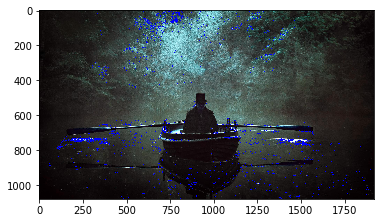

(<matplotlib.image.AxesImage at 0x7f1800089bd0>, None)

In [21]:
filename = 'taboo.jpg'
img = cv2.imread(filename,cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

# cv2.imshow('dst',img)
#if cv2.waitKey(0) & 0xff == 27:
 #  cv2.destroyAllWindows()
plt.imshow(img),plt.show()    

# Shi-Tomasi Corner Detector & Good Features to Track


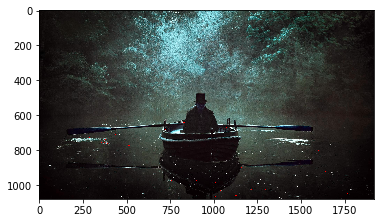

(<matplotlib.image.AxesImage at 0x7f17fb797a50>, None)

In [22]:
    from matplotlib import pyplot as plt
    
    img = cv2.imread('taboo.jpg')
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
    corners = np.int0(corners)
    
    for i in corners:
        x,y = i.ravel()
        cv2.circle(img,(x,y),3,255,-1)
    
    plt.imshow(img),plt.show()

# FAST Algorithm for Corner Detection

('Threshold: ', 25)
('nonmaxSuppression: ', True)
('neighborhood: ', 2)
('Total Keypoints with nonmaxSuppression: ', 18302)
Total Keypoints without nonmaxSuppression:  43779


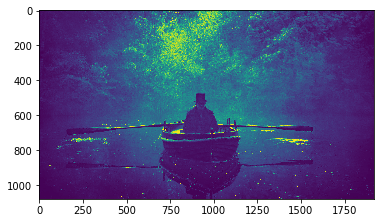

(<matplotlib.image.AxesImage at 0x7f17fb7dd2d0>, None)

In [23]:
from matplotlib import pyplot as plt

img = cv2.imread('taboo.jpg',0)

# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create(threshold=25)

# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv2.drawKeypoints(img, kp, None,color=(255,0,0))

print("Threshold: ", fast.getThreshold())
print("nonmaxSuppression: ", fast.getNonmaxSuppression())
print("neighborhood: ", fast.getType())
print("Total Keypoints with nonmaxSuppression: ", len(kp))

cv2.imwrite('fast_true.png',img2)

# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img,None)

print "Total Keypoints without nonmaxSuppression: ", len(kp)

img3 = cv2.drawKeypoints(img, kp, None, color=(250,0,0))

cv2.imwrite('fast_false.png',img3)

#cv2.imshow("fast",img2)
#if cv2.waitKey(0) & 0xff == 27:
#       cv2.destroyAllWindows()
plt.imshow(img),plt.show()


# BRIEF (Binary Robust Independent Elementary Features)

32
(837, 32)


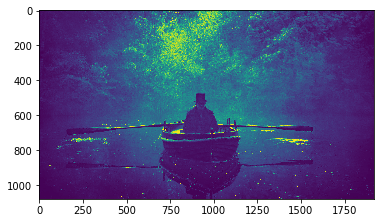

(<matplotlib.image.AxesImage at 0x7f17fb617790>, None)

In [24]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('taboo.jpg',0)
# Initiate FAST detector
star = cv2.xfeatures2d.StarDetector_create()
# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
# find the keypoints with STAR
kp = star.detect(img,None)
# compute the descriptors with BRIEF
kp, des = brief.compute(img, kp)
print brief.descriptorSize()
print des.shape
plt.imshow(img),plt.show()

# ORB (Oriented FAST and Rotated BRIEF)

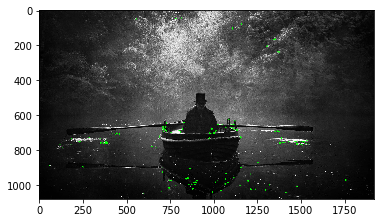

(<matplotlib.image.AxesImage at 0x7f17fb6d1710>, None)

In [25]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('taboo.jpg',0)

# Initiate STAR detector
orb = cv2.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img,kp,None,color=(0,255,0), flags=0)
plt.imshow(img2),plt.show()